In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [3]:
# Load dataset (Change 'heart.csv' to your dataset filename)
df = pd.read_csv("heart.csv")

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check dataset information
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nDataset Statistics:")
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  D

In [4]:
# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["target"])  # All columns except target
y = df["target"]  # Target column (0 = No heart attack, 1 = Heart attack)


In [5]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset sizes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (820, 13), Testing Set: (205, 13)


In [6]:
# Standardization (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [8]:
# Make predictions on test set
y_pred = model.predict(X_test_scaled)


In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# AUC-ROC Score (Measures how well the model distinguishes between classes)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)



Model Accuracy: 0.81
AUC-ROC Score: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


Confusion Matrix:
 [[70 30]
 [ 9 96]]


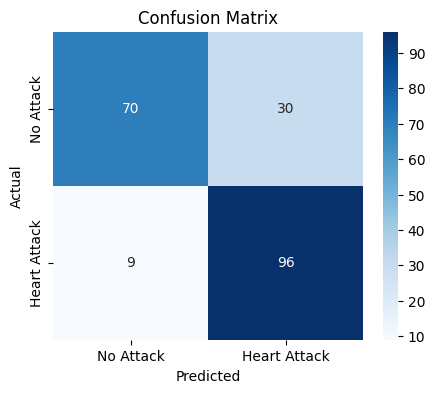

In [10]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Heart Attack"], yticklabels=["No Attack", "Heart Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Load dataset
df = pd.read_csv("heart.csv")

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["target"])  # Features
y = df["target"]  # Target (0 = No heart attack, 1 = Heart attack)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Function to take user input and predict heart attack risk
def predict_heart_attack():
    print("\nEnter Patient Details:")

    age = float(input("Age: "))
    sex = int(input("Sex (1 = Male, 0 = Female): "))
    cp = int(input("Chest Pain Type (0-3): "))
    trestbps = float(input("Resting Blood Pressure: "))
    chol = float(input("Serum Cholesterol (mg/dL): "))
    fbs = int(input("Fasting Blood Sugar > 120 mg/dL (1 = Yes, 0 = No): "))
    restecg = int(input("Resting ECG Results (0-2): "))
    thalach = float(input("Maximum Heart Rate Achieved: "))
    exang = int(input("Exercise Induced Angina (1 = Yes, 0 = No): "))
    oldpeak = float(input("ST Depression Induced by Exercise: "))
    slope = int(input("Slope of Peak Exercise ST Segment (0-2): "))
    ca = int(input("Number of Major Vessels Colored by Fluoroscopy (0-3): "))
    thal = int(input("Thalassemia (0-3): "))

    # Convert input to array
    user_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Scale the input data
    user_data_scaled = scaler.transform(user_data)

    # Predict using the trained model
    prediction = model.predict(user_data_scaled)

    # Print the result
    if prediction[0] == 1:
        print("\n🔴 High risk of Heart Attack! Consult a doctor immediately.")
    else:
        print("\n🟢 Low risk of Heart Attack. Maintain a healthy lifestyle!")

# Call the function to take input and predict
predict_heart_attack()



Enter Patient Details:
Age: 50
Sex (1 = Male, 0 = Female): 1
Chest Pain Type (0-3): 2
Resting Blood Pressure: 120
Serum Cholesterol (mg/dL): 1
Fasting Blood Sugar > 120 mg/dL (1 = Yes, 0 = No): 1
Resting ECG Results (0-2): 2
Maximum Heart Rate Achieved: 100
Exercise Induced Angina (1 = Yes, 0 = No): 1
ST Depression Induced by Exercise: 2
Slope of Peak Exercise ST Segment (0-2): 2
Number of Major Vessels Colored by Fluoroscopy (0-3): 2
Thalassemia (0-3): 2

🟢 Low risk of Heart Attack. Maintain a healthy lifestyle!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
